# Do you want to know why you lose hair?

## 📖 Background
As we age, hair loss becomes one of the health concerns of many people. The fullness of hair not only affects appearance, but is also closely related to an individual's health.

A survey brings together a variety of factors that may contribute to hair loss, including genetic factors, hormonal changes, medical conditions, medications, nutritional deficiencies, psychological stress, and more. Through data exploration and analysis, the potential correlation between these factors and hair loss can be deeply explored, thereby providing useful reference for the development of individual health management, medical intervention and related industries.

## 💾 The data

The survey provides the information you need in the `Predict Hair Fall.csv` in the `data` folder.

#### Data contains information on persons in this survey. Each row represents one person.
- "Id" - A unique identifier for each person.
- "Genetics" - Whether the person has a family history of baldness.
- "Hormonal Changes" - Indicates whether the individual has experienced hormonal changes (Yes/No).
- "Medical Conditions" - Medical history that may lead to baldness; alopecia areata, thyroid problems, scalp infections, psoriasis, dermatitis, etc.
- "Medications & Treatments" - History of medications that may cause hair loss; chemotherapy, heart medications, antidepressants, steroids, etc.
- "Nutritional Deficiencies" - Lists nutritional deficiencies that may contribute to hair loss, such as iron deficiency, vitamin D deficiency, biotin deficiency, omega-3 fatty acid deficiency, etc.
- "Stress" - Indicates the stress level of the individual (Low/Moderate/High).
- "Age" - Represents the age of the individual.
- "Poor Hair Care Habits" - Indicates whether the individual practices poor hair care habits (Yes/No).
- "Environmental Factors" - Indicates whether the individual is exposed to environmental factors that may contribute to hair loss (Yes/No).
- "Smoking" - Indicates whether the individual smokes (Yes/No).
- "Weight Loss" - Indicates whether the individual has experienced significant weight loss (Yes/No).
- "Hair Loss" - Binary variable indicating the presence (1) or absence (0) of baldness in the individual.

## 💪 Competition challenge

Choose your difficulty level! You decide how challenging this competition will be. Every level will have an equal chance to win!

### Level 1: Descriptive statistics:
1. What is the average age? What is the age distribution?
2. Which medical conditions are the most common? How often do they occur?
3. What types of nutritional deficiencies are there and how often do they occur?

### Level 2: Visualization:

1. What is the proportion of patients with hair loss in different age groups?
2. What factors are associated with hair loss? 
3. What does hair loss look like under different stress levels? 

### Level 3: Machine learning:

1. A classification model can be built to predict whether an individual will suffer from hair loss based on given factors.
2. Use cluster analysis to explore whether there are different types of hair loss groups in the data set.
3. Use algorithms such as decision trees or random forests to identify the key factors that best predict hair loss.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('data/Predict Hair Fall.csv')
data.head(10)

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
5,139661,Yes,No,Psoriasis,Antibiotics,Magnesium deficiency,Low,37,No,Yes,No,Yes,1
6,169255,Yes,Yes,No Data,No Data,Selenium deficiency,High,40,Yes,No,No,No,1
7,112032,Yes,No,Dermatosis,Chemotherapy,Omega-3 fatty acids,High,35,Yes,No,Yes,No,0
8,140785,Yes,No,Eczema,Steroids,Selenium deficiency,Moderate,19,No,No,Yes,Yes,1
9,187999,No,Yes,Ringworm,Rogaine,Magnesium deficiency,Moderate,49,Yes,Yes,Yes,No,0


## Age


Avrage age: 34.188188188188185


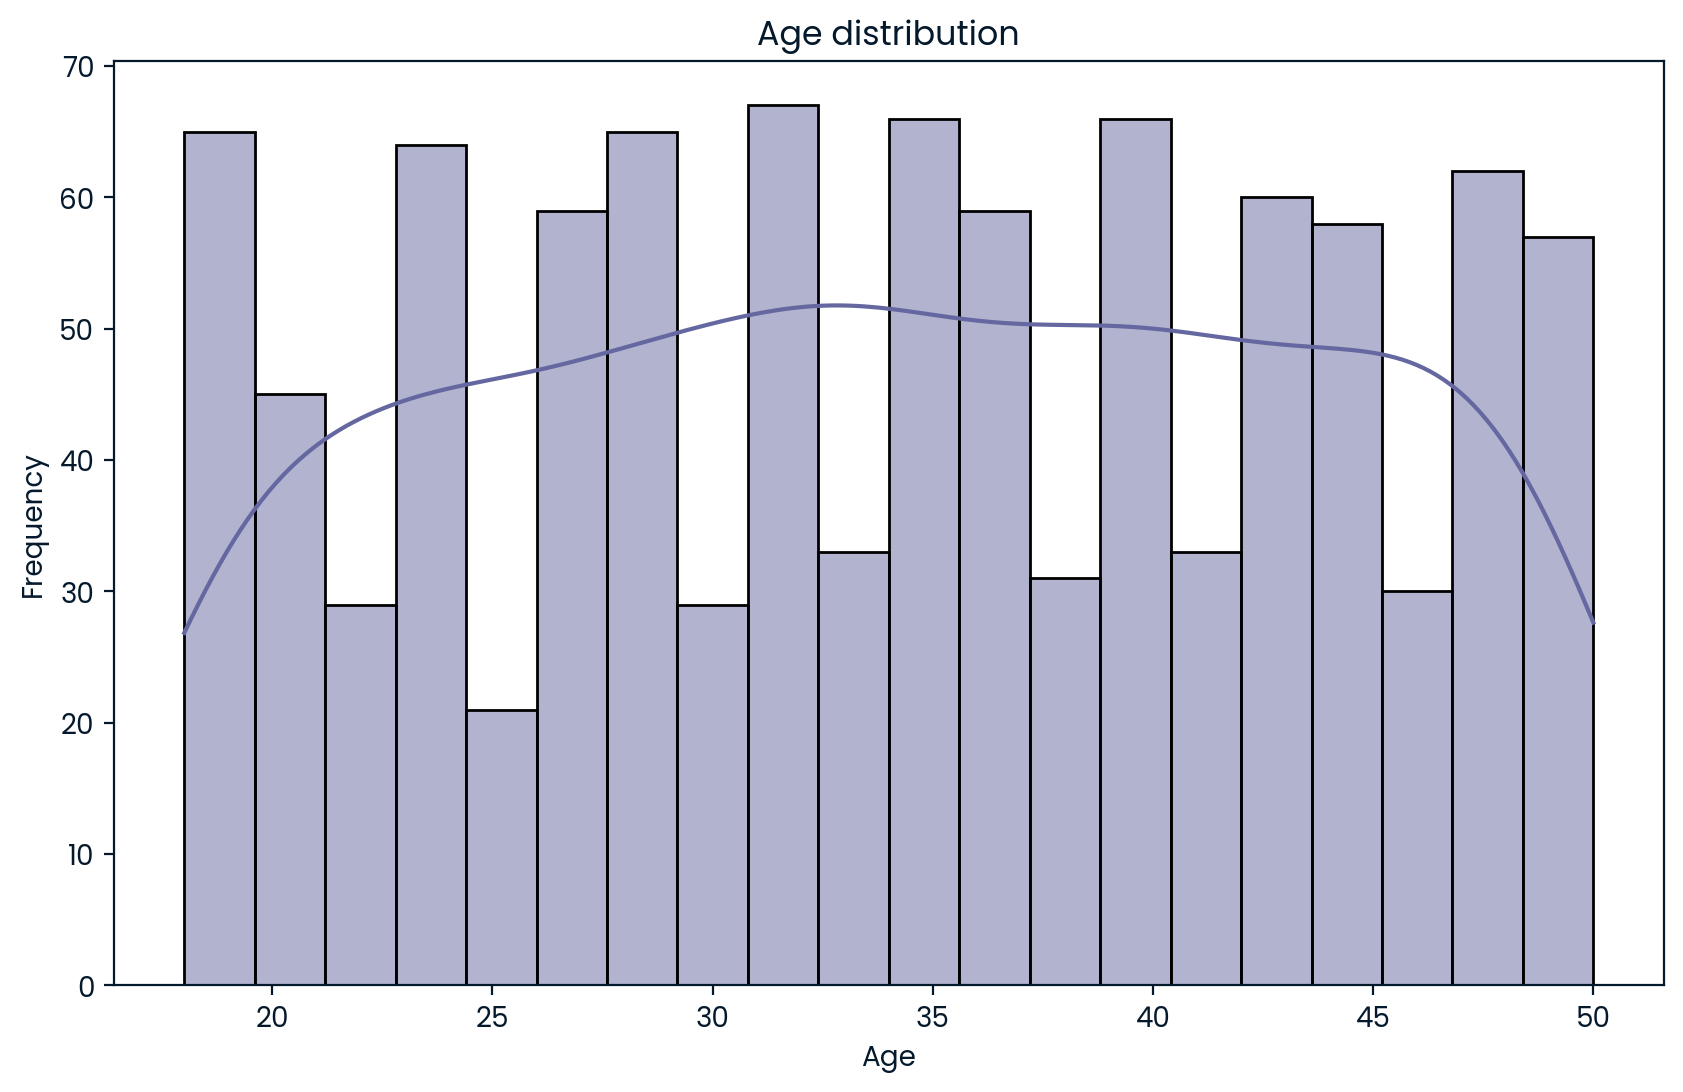

In [52]:

average_age = data['Age'].mean()
print(f"Avrage age: {average_age}")

plt.figure(figsize=(10,6))
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## medical conditions

Most common medical conditions:
Medical Conditions
No Data                  110
Alopecia Areata          107
Psoriasis                100
Thyroid Problems          99
Androgenetic Alopecia     98
Dermatitis                92
Dermatosis                88
Seborrheic Dermatitis     88
Scalp Infection           79
Eczema                    69
Ringworm                  69
Name: count, dtype: int64


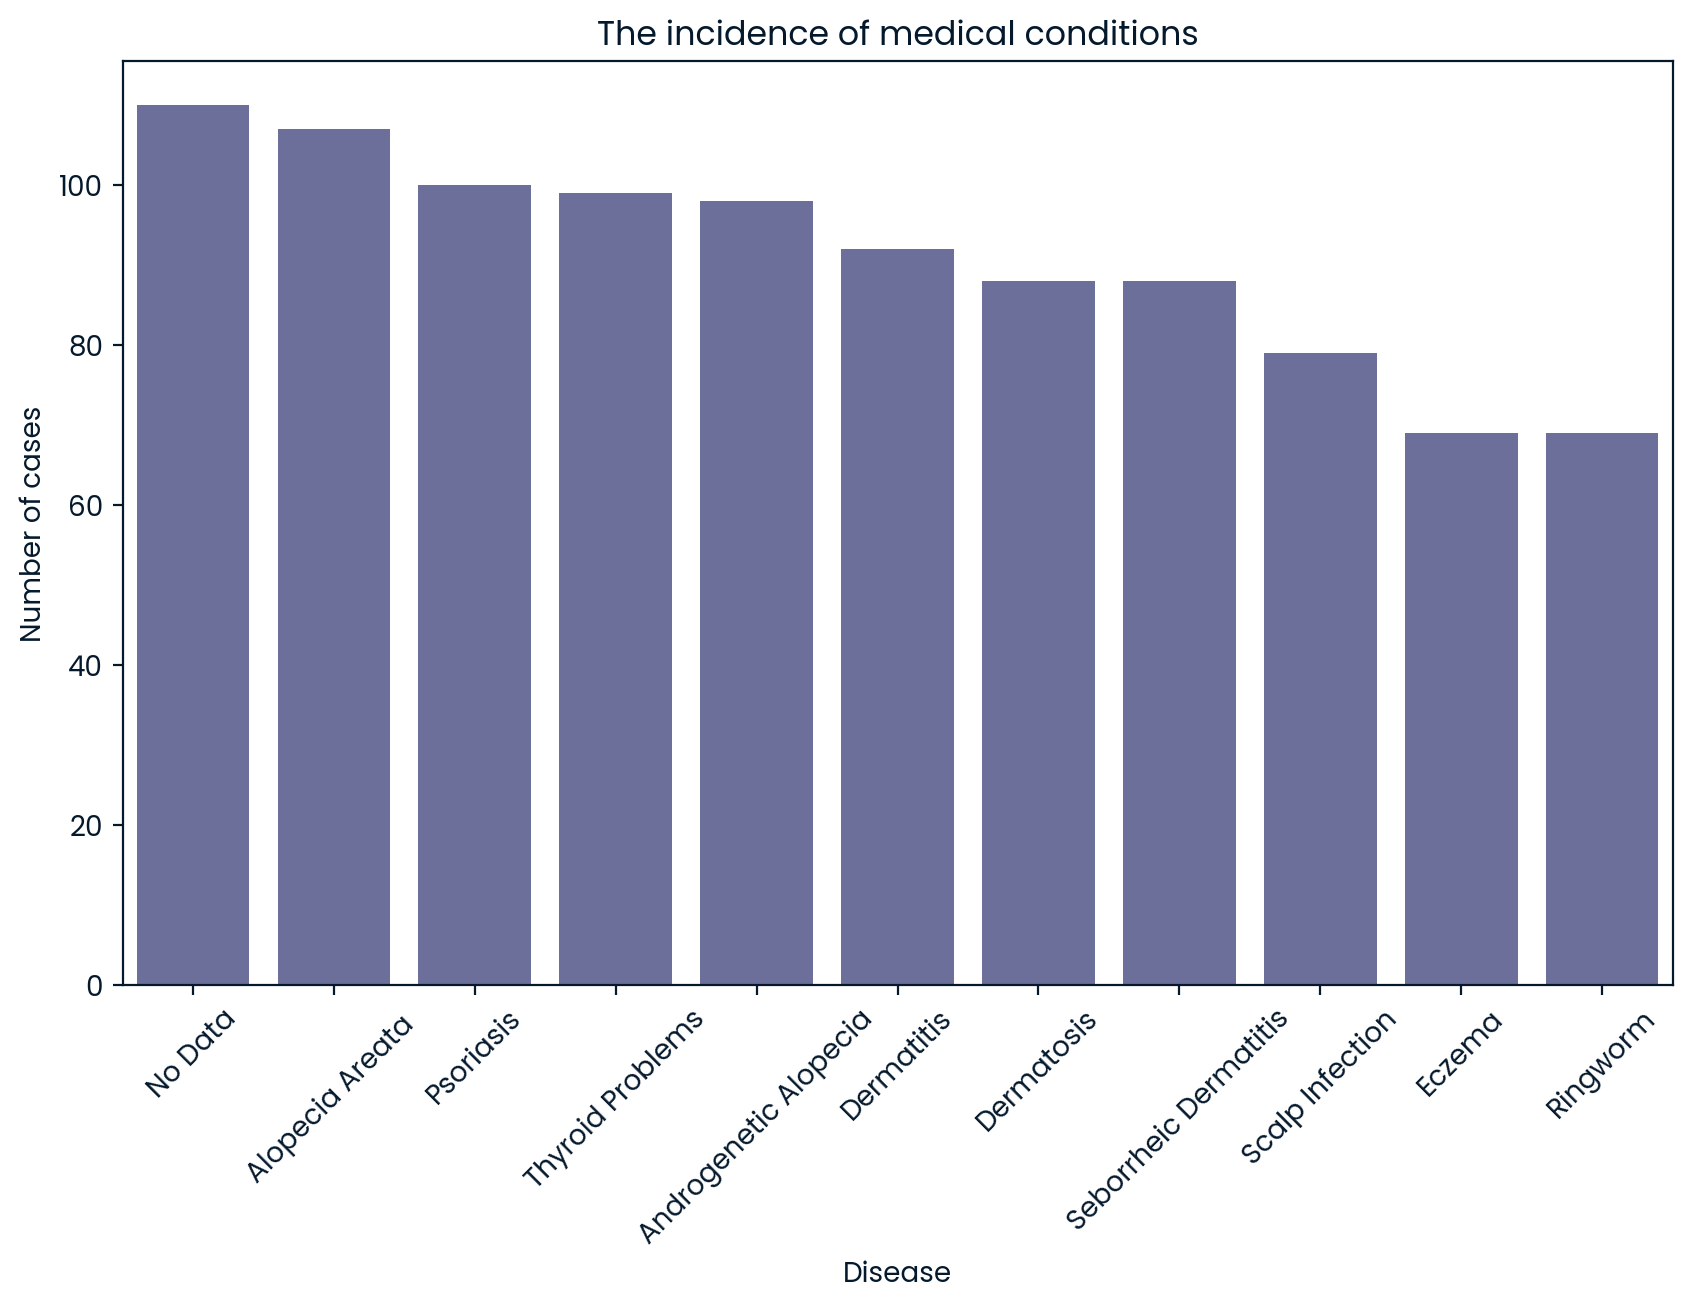

In [53]:
medical_conditions = data['Medical Conditions'].value_counts()
print("Most common medical conditions:")
print(medical_conditions)

plt.figure(figsize=(10,6))
sns.barplot(x=medical_conditions.index, y=medical_conditions.values)
plt.title('The incidence of medical conditions')
plt.xlabel('Disease')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)
plt.show()


## Count the occurrence

The most common nutritional deficiencies:
Nutritional Deficiencies
Zinc Deficiency         108
Vitamin D Deficiency    104
Biotin Deficiency        99
Vitamin A Deficiency     99
Omega-3 fatty acids      92
Protein deficiency       90
Magnesium deficiency     84
Vitamin E deficiency     83
Selenium deficiency      82
No Data                  80
Iron deficiency          78
Name: count, dtype: int64


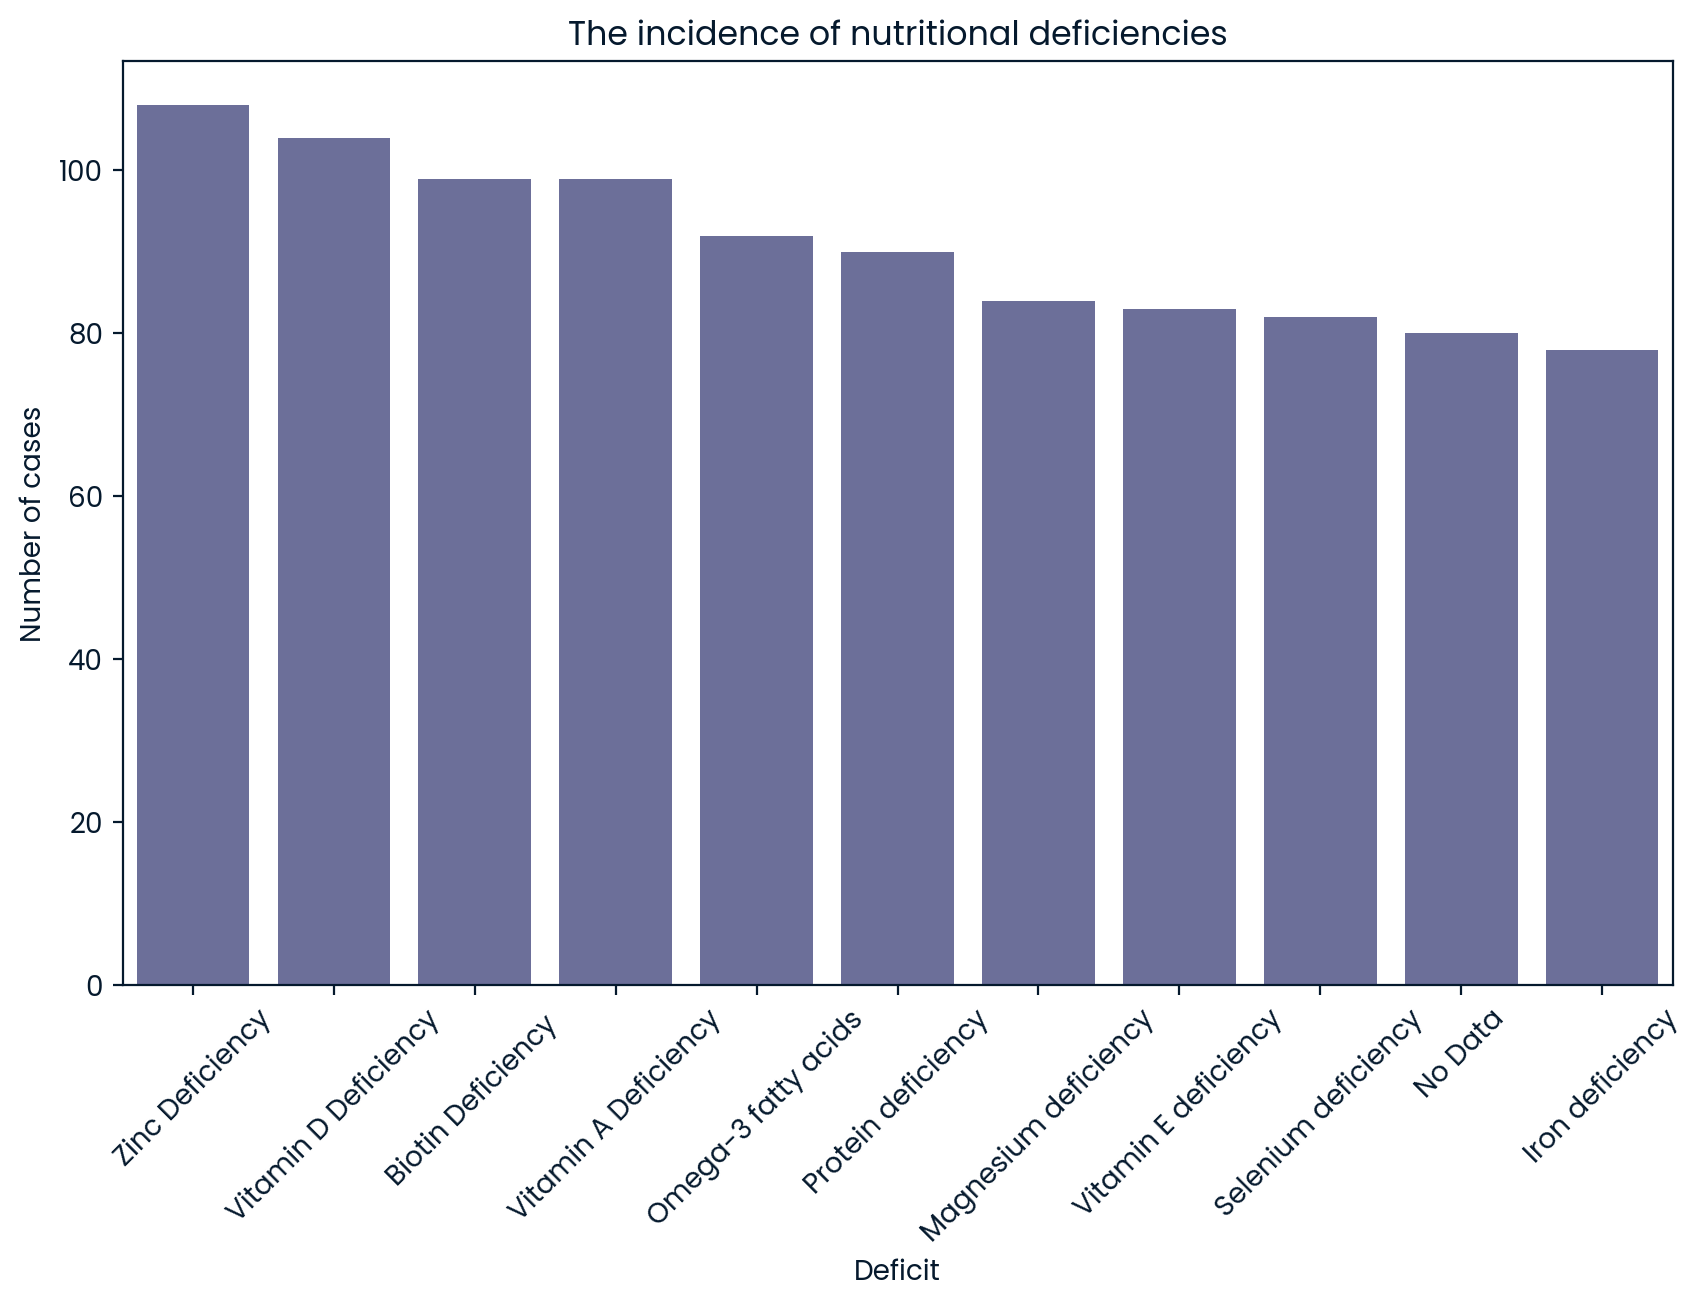

In [54]:
data.columns = data.columns.str.strip()
nutritional_deficiencies = data['Nutritional Deficiencies'].value_counts()
print("The most common nutritional deficiencies:")
print(nutritional_deficiencies)

plt.figure(figsize=(10,6))
sns.barplot(x=nutritional_deficiencies.index, y=nutritional_deficiencies.values)
plt.title('The incidence of nutritional deficiencies')
plt.xlabel('Deficit')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)
plt.show()


## age groups

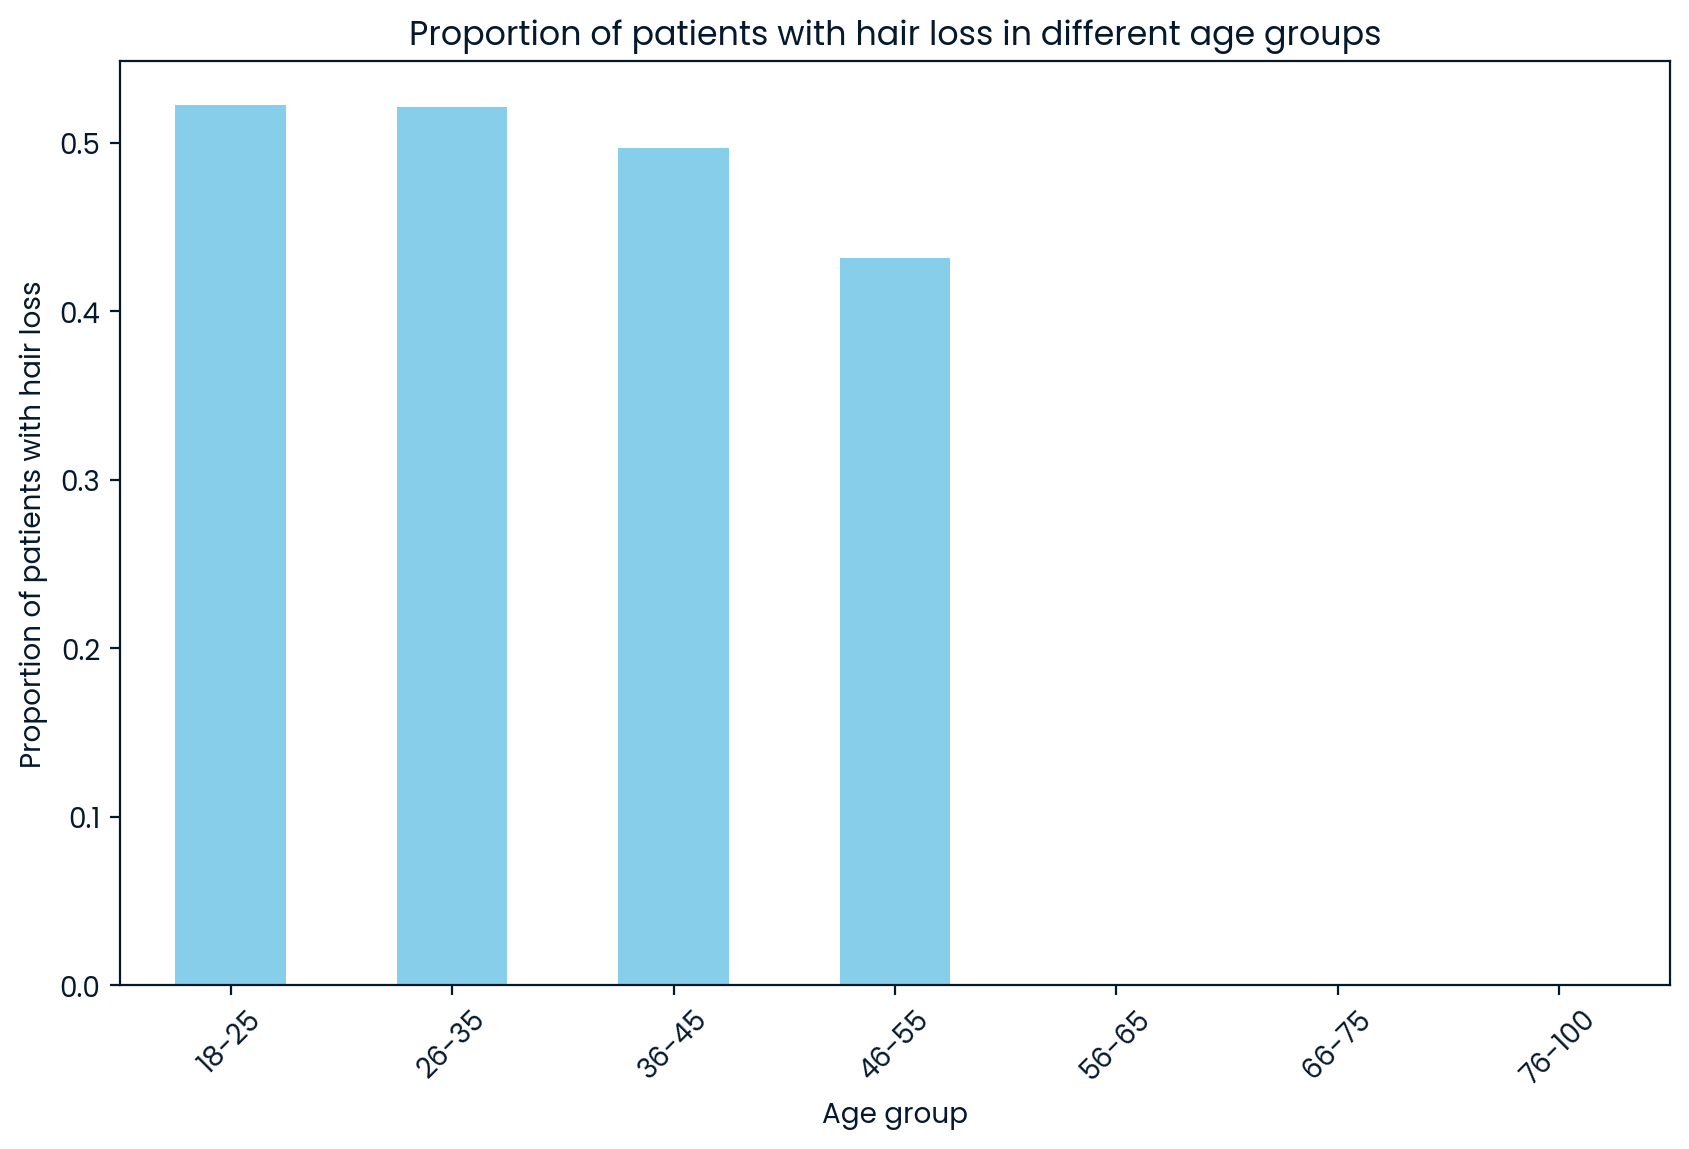

In [55]:
bins = [18, 25, 35, 45, 55, 65, 75, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-100']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

age_group_hair_loss = data.groupby('Age Group')['Hair Loss'].mean()

# Wykres
plt.figure(figsize=(10,6))
age_group_hair_loss.plot(kind='bar', color='skyblue')
plt.title('Proportion of patients with hair loss in different age groups')
plt.xlabel('Age group')
plt.ylabel('Proportion of patients with hair loss')
plt.xticks(rotation=45)
plt.show()


## correlation matrix

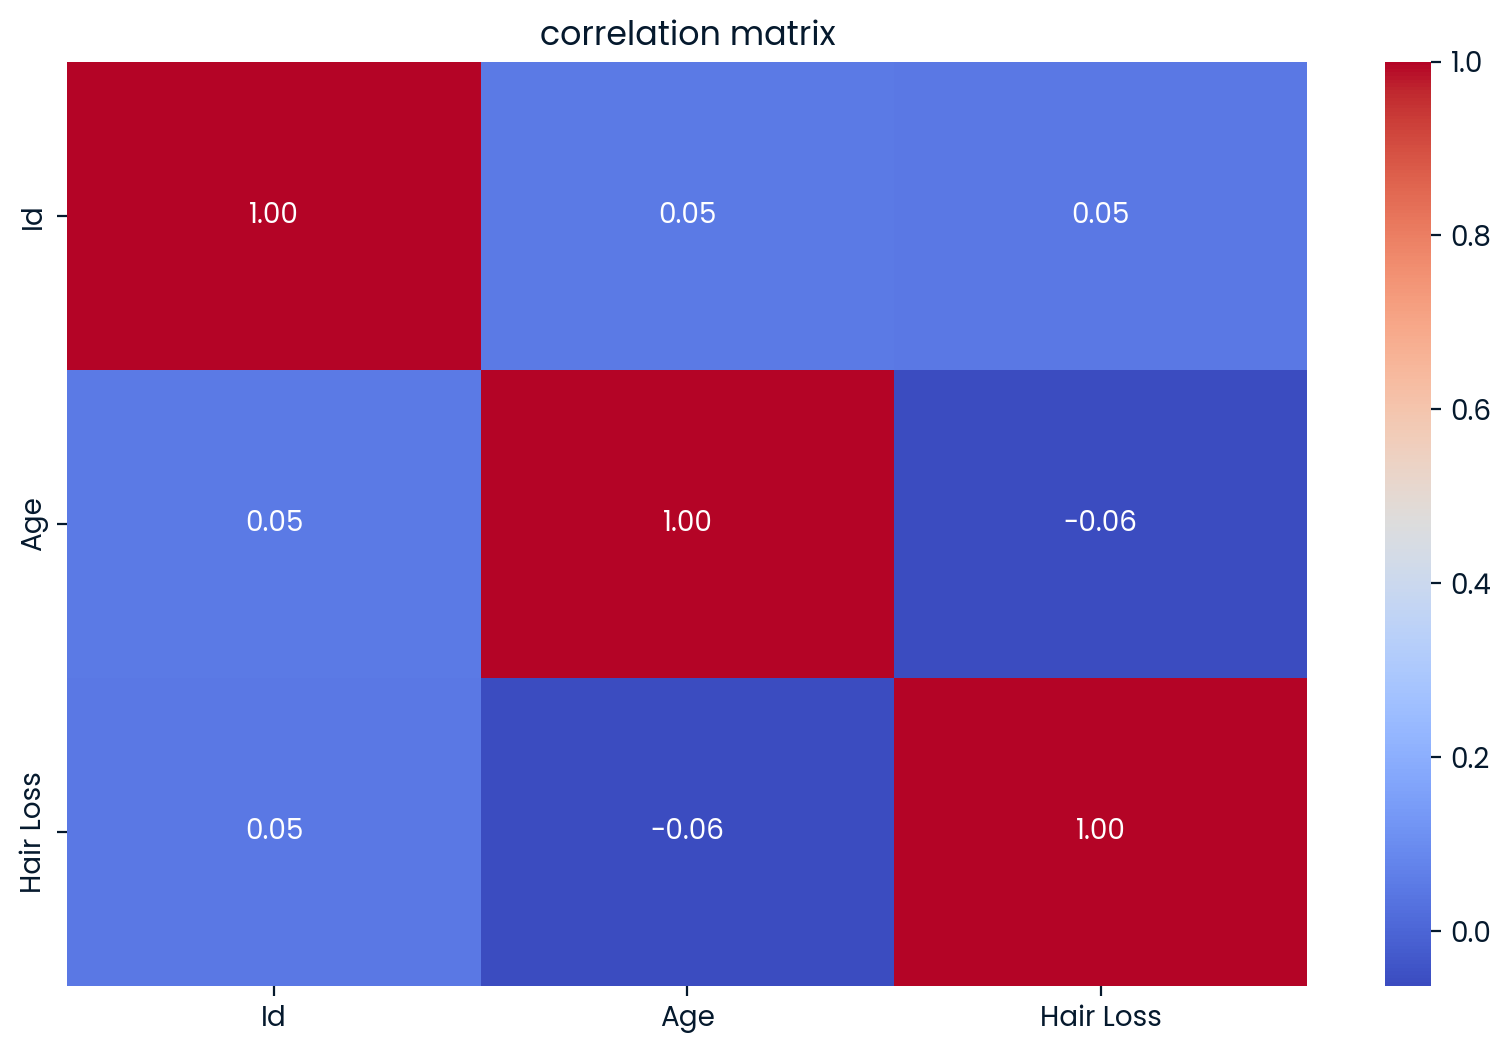

In [56]:
numeric_data = data.select_dtypes(include=['number'])


numeric_data = numeric_data.dropna()

correlation = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation matrix')
plt.show()

## Prepare

In [57]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'Age': [22, 35, 50, 29, 67, 30, 45, 38],
    'Gender': ['M', 'F', 'F', 'M', 'M', 'F', 'M', 'M'],
    'Weight': [70, 55, 80, 68, 90, 50, 85, 72],
    'Hair Loss': [1, 0, 1, 0, 1, 0, 1, 0]  # Target variable
})

def age_category(age):
    if age < 25:
        return 'Young'
    elif age < 45:
        return 'Middle-aged'
    elif age < 65:
        return 'Senior'
    else:
        return 'Elderly'

data['Age Category'] = data['Age'].apply(age_category)

data = pd.get_dummies(data, columns=['Age Category'], drop_first=True)

print(data.head())


   Age Gender  ...  Age Category_Senior  Age Category_Young
0   22      M  ...                False                True
1   35      F  ...                False               False
2   50      F  ...                 True               False
3   29      M  ...                False               False
4   67      M  ...                False               False

[5 rows x 7 columns]


## Hyper model

In [58]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
X = data.data
y = data.target

print("Number of samples per class:")
print(pd.Series(y).value_counts())

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print(f"Predictions: {y_pred}")

Number of samples per class:
0    50
1    50
2    50
Name: count, dtype: int64
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


## Model


In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

if isinstance(X, np.ndarray):
    X = pd.DataFrame(X)

print("Unique values in y before encoding:", np.unique(y))

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

for column in X.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X[column] = label_encoder.fit_transform(X[column])

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_model.fit(X, y)

y_pred_gb = gb_model.predict(X)

print("Classification Report (Gradient Boosting):")
print(classification_report(y, y_pred_gb))

y_pred_prob = gb_model.predict_proba(X)

if len(np.unique(y)) == 2:  
    print(f"AUC-ROC: {roc_auc_score(y, y_pred_prob[:, 1])}")
else:
    print(f"AUC-ROC (Multi-Class): {roc_auc_score(y, y_pred_prob, multi_class='ovr')}")


Unique values in y before encoding: [0 1 2]
Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

AUC-ROC (Multi-Class): 1.0


## Cross

In [60]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=100, random_state=42)

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation results: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean()}")


Cross-validation results: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9666666666666668


## Curve

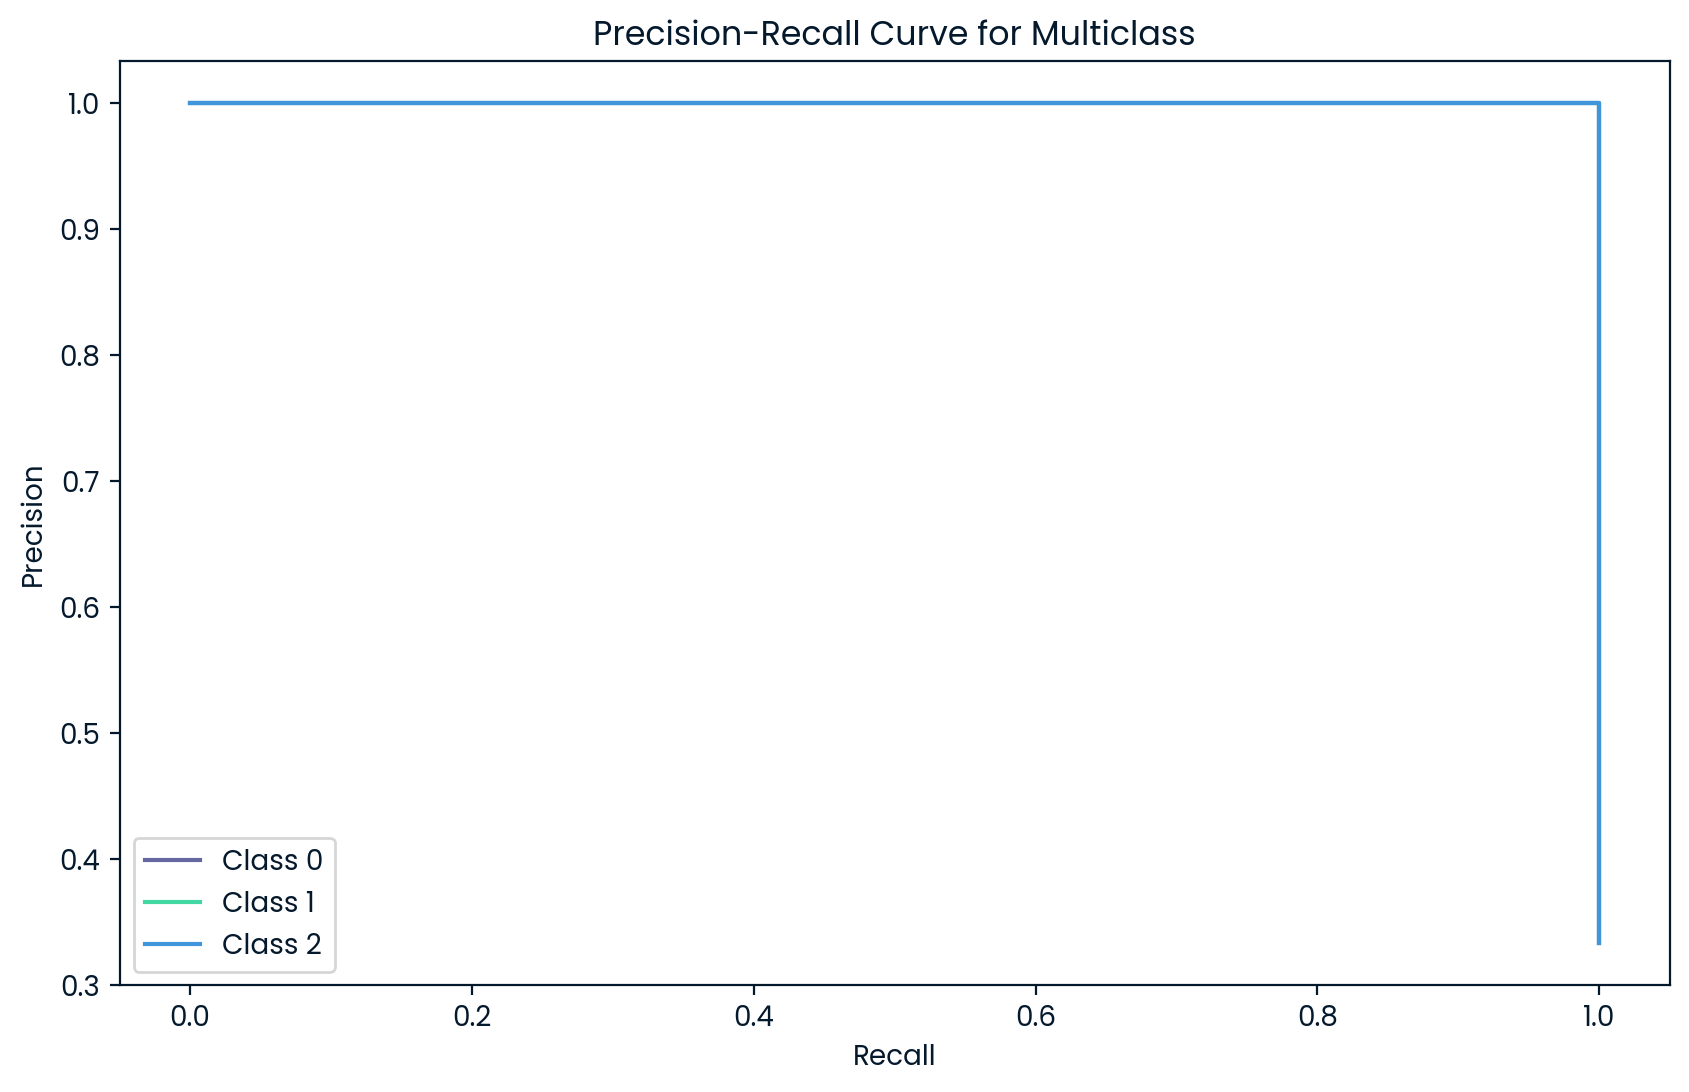

In [61]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_pred_prob = gb_model.predict_proba(X)

plt.figure(figsize=(10, 6))

for i in range(y_pred_prob.shape[1]):
    precision, recall, _ = precision_recall_curve(y == i, y_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.title('Precision-Recall Curve for Multiclass')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


## 🧑‍⚖️ Judging criteria

Depending on your skill level, decide on which aspect you want to focus. Each difficulty level (descriptive statistics, visualization, or machine learning) has an equal chance to win.
A well-written descriptive analysis is better than a poorly executed machine learning attempt!

There will only be three winners. The **top 3** will contain the best entry for each difficulty level.

Judging will happen as follows:

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Quality of the executive summary.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendations.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** (if applicable) | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## 🏆 Prizes

| Ranking | Prize |
|:---------|:----------|
| **1st Prize** | **$500**     |
| **2nd Prize**  | **$400**   |
| **3rd Prize** | **$300**  |


## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!